In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Теперь подгрузим файл и посмотрим на его первые строки:

In [44]:
data = pd.read_csv('data_flats.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


Также обязательно запрашиваем список переменных с их типами, заодно сможем посмотреть, сколько у нас пропусков:

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

Также количество пропусков для каждого признака можно посмотреть следующим образом:

In [46]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

Или можно оценить визульно количество пропусков и их распределение:

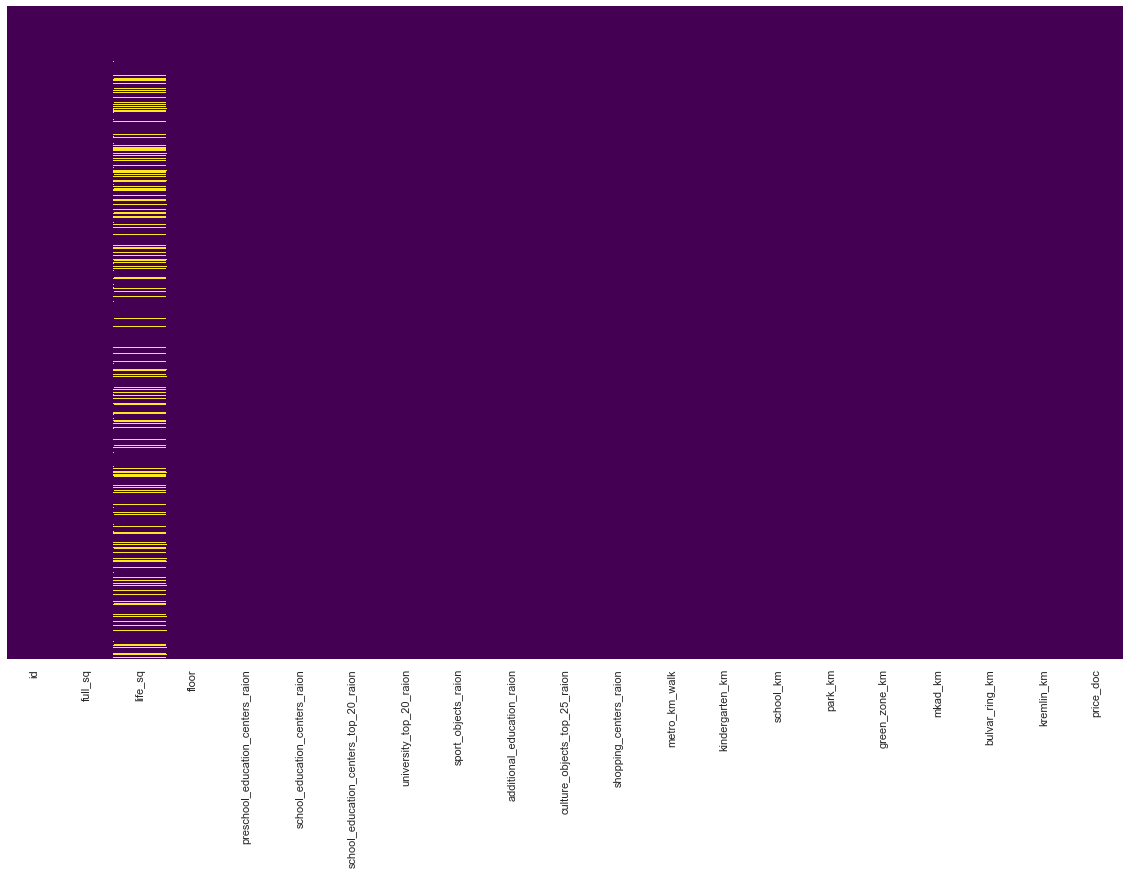

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Здесь фиолетовым показаны заполненные ячейки, а желтым — пропущенные значения. Благодаря этому мы можем сразу оценить количество пропусков и посмотреть, в каких переменных они встречаются. Если пропуски встречаются в большом количестве только в нескольких переменных, которые не являются для нас важными, можно их удалить.

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

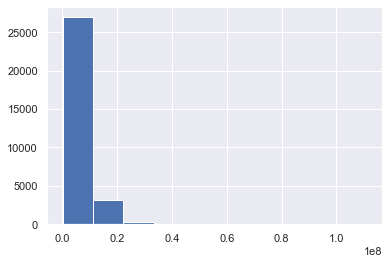

In [48]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

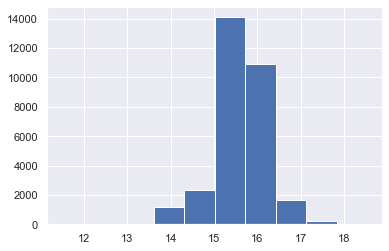

In [49]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();


Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

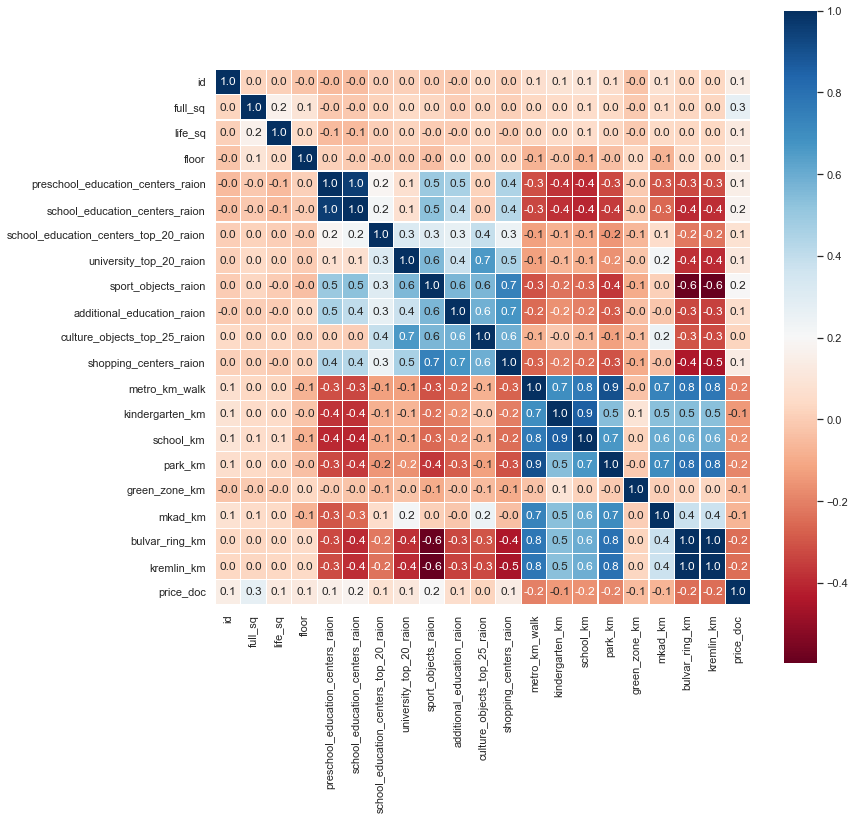

In [50]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [51]:
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Общее количество строк с пропущенными значениями: ', count)

Общее количество строк с пропущенными значениями:  6544


In [52]:
data.dropna(axis=0,inplace=True)

In [53]:
data.shape

(23925, 21)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import robust_scale
from sklearn.model_selection import train_test_split


In [103]:
data['price_doc'] = np.log(data['price_doc'] + 1)

In [1]:
data.drop(columns=['school_education_centers_raion', 'school_km',
                   'park_km', 'bulvar_ring_km', 'life_sq', 'id'], inplace=True)


NameError: name 'data' is not defined

In [119]:
# 1. Удаляю строки, где есть хотя бы один пропуск.
data.dropna(axis=0, inplace=True)
X = data.drop(columns='price_doc')
Y = data.price_doc

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=77)

In [121]:
r_train = robust_scale(X_train, axis=0)
r_test = robust_scale(X_test, axis=0)


In [122]:
# обучаем модель
myModel = LinearRegression()  # Обозначаем, что наша модель - линейная регрессия
myModel.fit(r_train, Y_train)  # обучаем модель на обучающих данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
# предсказания независимой переменной
y_pred = myModel.predict(r_test)

In [124]:
y_pred

array([1.33791098, 1.33906707, 1.33304182, ..., 1.3371472 , 1.33651961,
       1.33642714])

In [125]:
y_pred = np.exp(y_pred)
Y_test = np.exp(Y_test)

In [126]:

MSE = metrics.mean_squared_error(Y_test, y_pred)
print('ответ', round(MSE))
print('правильный ответ 16647931507747')
print('разница с правильным ответом', 16647931507747 - 16647290245834)

ответ 0.0
правильный ответ 16647931507747
разница с правильным ответом 641261913
